# Cunjunction Data Messages

## README

This notebook is intended to provide a deep analysis of Cunjunction Data Message (CDM) content. The goal is to understand the data and to be able to extract useful information from it.  
You will find the following sections:

  * [Data Loading](#Data-Loading)
  * [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  * [Data Visualization](#Data-Visualization) 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## I. Data Loading

Kessler accepts CDMs either in KVN (Key/Value Notation) format or as pandas dataframes. We hereby show a pandas dataframe loading example:

In [4]:
file_name = '/Users/nicolas/Desktop/Etudes/4_centrale_sup/CentraleSupelec/cours/centralesup_S_1/lab_project/spacecraft_collision_avoidance/data/train_data.csv'
df = pd.read_csv(file_name)

In [5]:
df.head()

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_object_type,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_rcs_estimate,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,-13666.8,-7.2,-12637.0,-5525.9,1.0,0.0,3.78,3.78,459,458,98.9,1.265,0.402,0.013826,0.007173,0.000051,6996.918867,0.003997,97.806412,-0.397969,0.292258,0.040799,0.394221,-0.999674,-0.038498,-0.981098,0.214612,-0.316493,-0.210247,0.170737,-0.001551,0.531593,0.002117,-0.179278,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.607320,0.003144,74.045735,-0.824859,0.473976,-0.002576,0.825216,-0.999998,0.003565,-0.732954,0.220006,-0.814249,-0.220621,0.249855,0.196620,0.722186,-0.196908,-0.668487,1.0,2.0,646.745439,590.818294,650.497251,606.443389,-73.574095,-23.618769,0.029910,129.430951,737347.125225,4.429923e+16,4.057932,266.722309,137.617114,54366.864909,1.781418,46.612573,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0
1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,-13319.8,-7.0,-12637.0,-5525.9,1.0,0.0,3.79,3.79,456,455,98.5,1.270,0.402,0.013487,0.009139,0.000060,6996.920255,0.003996,97.806420,-0.073137,0.297366,0.060541,0.069652,-0.998192,-0.052511,-0.994240,-0.029644,-0.302333,0.034030,0.179696,0.001552,0.561142,-0.005165,-0.181036,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.621053,0.003144,74.045736,-0.818207,0.482754,-0.003578,0.818573,-0.999998,0.004574,-0.728759,0.202595,-0.817490,-0.203216,0.258964,0.195718,0.721903,-0.196008,-0.674979,1.0,2.0,646.743506,590.823004,650.513314,606.454793,-73.570690,-23.618769,0.029079,271.540424,114138.993569,4.378610e+16,3.526780,262.191819,56.070117,54082.067268,1.800959,46.595869,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0
2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,-13256.1,-7.0,-12637.0,-5525.9,1.0,0.0,3.79,3.80,456,455,98.5,1.257,0.402,0.013357,0.007057,0.000060,6996.920553,0.003996,97.806418,-0.109230,0.305189,0.043711,0.107079,-0.996235,-0.034287,-0.996674,0.033933,-0.308501,-0.030161,0.123760,0.019630,0.579274,-0.023726,-0.125737,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.623524,0.003144,74.045737,-0.817408,0.483828,-0.003742,0.817774,-0.999998,0.004738,-0.729083,0.201698,-0.817662,-0.202320,0.260092,0.195558,0.721854,-0.195849,-0.675347,1.0,2.0,646.745607,590.821499,650.515082,606.457965,-73.570088,-23.618769,0.029079,347.899292,46960.041117,4.369105e+16,3.362037,261.666544,37.497947,54027.391201,1.821940,46.592757,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0
3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,-13350.7,-7.0,-12637.0,-552

### Is this dataset consistent with the _CCDS Cunjuncton Data Message Blue Book Standard_?

In [6]:
# Check number of mandatory fields in the Blue Book vs number of fields in the dataset

## II. Exploratory Data Analysis

### 0. Intro

- ##### ***What is a CDM ?*** 
    A CDM (Cunjunction Data Message) is a notification sent under the form of a computer file by the US Air Force to satellite operators when two objects in orbit are at risk of colliding. In order to maintain order in Earth orbits, the United States Air Force maintains the Catalog of Earth orbiting satellites, or **SATCAT**.

- ##### ***What is SATCAT?***  
    The objective of the Satellite Catalog is to **allow radar tracking** (through the Space Surveillance Network) of the various elements in orbit **larger than 10 cm** to avoid collisions of space debris with active spacecraft.   

    When a **spacecraft explodes** in space or fragments, **each** of the generated debris larger than 10 cm also receives an **identifier**.   

    For example, following the ***collision between the Iridium-33 and Kosmos-2251*** satellites in 2009, **330** pieces of debris from the Iridium satellite were catalogued (in the sequence 33772 to 4998) and about 1,050 more for the Kosmos-2251 satellite (in the sequence 33757 to 40811).

- ##### ***What information does the CDM provide to the satellite operator to take its decision?***   
  The CDM includes information about the **position** and **trajectory** of the objects, as well as any recommended actions to avoid the collision.   
  These informations are gathered thanks to the SSN, a global network of radar and optical sensors that track objects in Earth orbit and operated by the U.S. Air Force.   
  The SSN is responsible for detecting and tracking objects in space, including satellites, space debris, and other objects, and for providing information about their orbits and any potential collisions.     

- ##### ***How to categorize the information provided by the CDM?***  
  Inside each CDM, there are 4 main ***categories*** of variables that are of interest for the collision avoidance system:

    * ***Event*** variables: they describe the event itself (e.g. event ID, event type, event start time, etc.)
    * ***Objects variables***: they describe the objects states involved in the event (e.g. object ID, object type, object size, etc.)
    * ***Collision variables***: they describe the collision itself (e.g. collision time, collision probability, etc.)
    * ***Additional external variables***: they describe the external conditions (e.g. solar activity, atmospheric drag, etc.)

  **Event** variables are the same for all CDMs of the same event. **Object States** and **Collision** variables are different for each CDM of the same event. **External variables** can vary.

- ##### ***Data*** 

  ***Event Variables***

  - `risk`: self-computed value at the epoch of each CDM [base 10 log]. In the test set, this value is to be predicted, at the time of closest approach for each event_id. Note that, as mentioned above, in the test set, we do not know the actual data contained in CDMs that are within 2 days to closest approach, since they happen in the "future".

  - `event_id`: unique id per collision event
  - `time_to_tca`: Time interval between CDM creation and time-of-closest approach [days]
  - `mission_id`: identifier of mission that will be affected
  - `max_risk_estimate`: maximum collision probability obtained by scaling combined covariance
  - `max_risk_scaling`: scaling factor used to compute maximum collision probability
  - `miss_distance`: relative position between chaser & target at tca [m]
  - `relative_speed`: relative speed between chaser & target at tca [m/s]
  - `relative_position_n`: relative position between chaser & target: normal (cross-track) [m]
  - `relative_position_r`: relative position between chaser & target: radial [m]
  - `relative_position_t`: relative position between chaser & target: transverse (along-track) [m]
  - `relative_velocity_n`: relative velocity between chaser & target: normal (cross-track) [m/s]
  - `relative_velocity_r`: relative velocity between chaser & target: radial [m/s]
  - `relative_velocity_t`: relative velocity between chaser & target: transverse (along-track) [m/s]
  - `c_object_type`: object type which is at collision risk with satellite
  - `geocentric_latitude`: Latitude of conjunction point [deg]
  - `azimuth`: relative velocity vector: azimuth angle [deg]
  - `elevation`: relative velocity vector: elevation angle [deg]
  - `F10`: 10.7 cm radio flux index [10−2210−22 W/(m2m2 Hz)]
  - `AP`: daily planetary geomagnetic amplitude index
  - `F3M`: 81-day running mean of F10.7 (over 3 solar rotations) [10−2210−22 W/(m2m2 Hz)]
  - `SSN`: Wolf sunspot number

  ***Shared Column Names Between the Chaser and the Target Object***

  - `x_sigma_rdot`: covariance; radial velocity standard deviation (sigma) [m/s]
  - `x_sigma_n`: covariance; (cross-track) position standard deviation (sigma) [m]
  - `x_cn_r`: covariance; correlation of normal (cross-track) position vs radial position
  - `x_cn_t`: covariance; correlation of normal (cross-track) position vs transverse (along-track) position
  - `x_cndot_n`: covariance; correlation of normal (cross-track) velocity vs normal (cross-track) position
  - `x_sigma_ndot`: covariance; normal (cross-track) velocity standard deviation (sigma) [m/s]
  - `x_cndot_r`: covariance; correlation of normal (cross-track) velocity vs radial position
  - `x_cndot_rdot`: covariance; correlation of normal (cross-track) velocity vs radial velocity
  - `x_cndot_t`: covariance; correlation of normal (cross-track) velocity vs transverse (along-track) position
  - `x_cndot_tdot`: covariance; correlation of normal (cross-track) velocity vs transverse (along-track) velocity
  - `x_sigma_r`: covariance; radial position standard deviation (sigma) [m]
  - `x_ct_r`: covariance; correlation of transverse (along-track) position vs radial position
  - `x_sigma_t`: covariance; transverse (along-track) position standard deviation (sigma) [m]
  - `x_ctdot_n`: covariance; correlation of transverse (along-track) velocity vs normal (cross-track) position
  - `x_crdot_n`: covariance; correlation of radial velocity vs normal (cross-track) position
  - `x_crdot_t`: covariance; correlation of radial velocity vs transverse (along-track) position
  - `x_crdot_r`: covariance; correlation of radial velocity vs radial position
  - `x_ctdot_r`: covariance; correlation of transverse (along-track) velocity vs radial position
  - `x_ctdot_rdot`: covariance; correlation of transverse (along-track) velocity vs radial velocity
  - `x_ctdot_t`: covariance; correlation of transverse (along-track) velocity vs transverse (along-track) position
  - `x_sigma_tdot`: covariance; transverse (along-track) velocity standard deviation (sigma) [m/s]
  - `x_position_covariance_det`: determinant of covariance (~volume)
  - `x_cd_area_over_mass`: ballistic coefficient [m2m2/kg]
  - `x_cr_area_over_mass`: solar radiation coefficient . A/m (ballistic coefficient equivalent)
  - `x_h_apo`: apogee (-RearthRearth) [km]
  - `x_h_per`: perigee (-RearthRearth)[km]
  - `x_j2k_ecc`: eccentricity
  - `x_j2k_inc`: inclination [deg]
  - `x_j2k_sma`: semi-major axis [km]
  - `x_sedr`: energy dissipation rate [W/kg]
  - `x_span`: size used by the collision risk computation algorithm (minimum 2 m diameter assumed for the chaser) [m]
  - `x_rcs_estimate`: radar cross-sectional area [m2m2]
  - `x_actual_od_span`: actual length of update interval for orbit determination [days]
  - `x_obs_available`: number of observations available for orbit determination (per CDM)
  - `x_obs_used`: number of observations used for orbit determination (per CDM)
  - `x_recommended_od_span`: recommended length of update interval for orbit determination [days]
  - `x_residuals_accepted`: orbit determination residuals
  - `x_time_lastob_end`: end of the time interval in days (with respect to the CDM creation epoch) of the last accepted observation used in the orbit determination
  - `x_time_lastob_start`: start of the time in days (with respect to the CDM creation epoch) of the last accepted observation used in the orbit determination
  - `x_weighted_rms`: root-mean-square in least-squares orbit determination

In [33]:
df.head()

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_object_type,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_rcs_estimate,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,-13666.8,-7.2,-12637.0,-5525.9,1.0,0.0,3.78,3.78,459,458,98.9,1.265,0.402,0.013826,0.007173,0.000051,6996.918867,0.003997,97.806412,-0.397969,0.292258,0.040799,0.394221,-0.999674,-0.038498,-0.981098,0.214612,-0.316493,-0.210247,0.170737,-0.001551,0.531593,0.002117,-0.179278,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.607320,0.003144,74.045735,-0.824859,0.473976,-0.002576,0.825216,-0.999998,0.003565,-0.732954,0.220006,-0.814249,-0.220621,0.249855,0.196620,0.722186,-0.196908,-0.668487,1.0,2.0,646.745439,590.818294,650.497251,606.443389,-73.574095,-23.618769,0.029910,129.430951,737347.125225,4.429923e+16,4.057932,266.722309,137.617114,54366.864909,1.781418,46.612573,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0
1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,-13319.8,-7.0,-12637.0,-5525.9,1.0,0.0,3.79,3.79,456,455,98.5,1.270,0.402,0.013487,0.009139,0.000060,6996.920255,0.003996,97.806420,-0.073137,0.297366,0.060541,0.069652,-0.998192,-0.052511,-0.994240,-0.029644,-0.302333,0.034030,0.179696,0.001552,0.561142,-0.005165,-0.181036,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.621053,0.003144,74.045736,-0.818207,0.482754,-0.003578,0.818573,-0.999998,0.004574,-0.728759,0.202595,-0.817490,-0.203216,0.258964,0.195718,0.721903,-0.196008,-0.674979,1.0,2.0,646.743506,590.823004,650.513314,606.454793,-73.570690,-23.618769,0.029079,271.540424,114138.993569,4.378610e+16,3.526780,262.191819,56.070117,54082.067268,1.800959,46.595869,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0
2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,-13256.1,-7.0,-12637.0,-5525.9,1.0,0.0,3.79,3.80,456,455,98.5,1.257,0.402,0.013357,0.007057,0.000060,6996.920553,0.003996,97.806418,-0.109230,0.305189,0.043711,0.107079,-0.996235,-0.034287,-0.996674,0.033933,-0.308501,-0.030161,0.123760,0.019630,0.579274,-0.023726,-0.125737,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.623524,0.003144,74.045737,-0.817408,0.483828,-0.003742,0.817774,-0.999998,0.004738,-0.729083,0.201698,-0.817662,-0.202320,0.260092,0.195558,0.721854,-0.195849,-0.675347,1.0,2.0,646.745607,590.821499,650.515082,606.457965,-73.570088,-23.618769,0.029079,347.899292,46960.041117,4.369105e+16,3.362037,261.666544,37.497947,54027.391201,1.821940,46.592757,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0
3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,-13350.7,-7.0,-12637.0,-552

## 1. CDM Main Variables

In [72]:
# Load data_description.json file
import json
with open('/Users/nicolas/Desktop/Etudes/4_centrale_sup/CentraleSupelec/cours/centralesup_S_1/lab_project/spacecraft_collision_avoidance/data/data_description.json') as f:
    data_description = json.load(f)

### 1.1 Event Variables

In [73]:
# List of event variables in the dataset
event_variables = data_description["data"]["event_variables"].keys()
df[event_variables].head()

,event_id,mission_id,c_object_type
0,0,5,UNKNOWN
1,0,5,UNKNOWN
2,0,5,UNKNOWN
3,0,5,UNKNOWN
4,0,5,UNKNOWN


### 1.2 Object States Variables

In [74]:
# Relative variables
speed = data_description["data"]["objects_variables"]["relative_variables"]["speed"].keys()
position = data_description["data"]["objects_variables"]["relative_variables"]["position"].keys()
velocity = data_description["data"]["objects_variables"]["relative_variables"]["velocity"].keys()

relative_variables = list(speed) + list(position) + list(velocity)

# Subjective variables
target_variables = data_description["data"]["objects_variables"]["subjective_variables"]["target_variables"].keys()
chaser_variables = data_description["data"]["objects_variables"]["subjective_variables"]["chaser_variables"].keys()

subjective_variables = list(target_variables) + list(chaser_variables)

# Object_variables
objects_variables = relative_variables + subjective_variables

In [75]:
df[objects_variables].head()

,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_span,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_h_apo,t_h_per,c_span,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_rcs_estimate,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_h_apo,c_h_per
0,13792.0,453.8,5976.6,-13666.8,-7.2,-12637.0,-5525.9,1.0,1.0,0.0,3.78,3.78,459,458,98.9,1.265,0.402,0.013826,0.007173,0.000051,6996.918867,0.003997,97.806412,646.745439,590.818294,2.0,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.607320,0.003144,74.045735,650.497251,606.443389
1,13792.0,474.3,5821.2,-13319.8,-7.0,-12637.0,-5525.9,1.0,1.0,0.0,3.79,3.79,456,455,98.5,1.270,0.402,0.013487,0.009139,0.000060,6996.920255,0.003996,97.806420,646.743506,590.823004,2.0,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.621053,0.003144,74.045736,650.513314,606.454793
2,13792.0,474.6,5796.2,-13256.1,-7.0,-12637.0,-5525.9,1.0,1.0,0.0,3.79,3.80,456,455,98.5,1.257,0.402,0.013357,0.007057,0.000060,6996.920553,0.003996,97.806418,646.745607,590.821499,2.0,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.623524,0.003144,74.045737,650.515082,606.457965
3,13792.0,472.7,5838.9,-13350.7,-7.0,-12637.0,-5525.9,1.0,1.0,0.0,3.86,3.86,443,442,98.4,1.254,0.402,0.013490,0.005480,0.000065,6996.920276,0.003997,97.806423,646.747747,590.818806,2.0,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.622932,0.003144,74.045736,650.515635,606.456229
4,13792.0,478.7,5811.1,-13288.0,-7.0,-12637.0,-5525.9,1.0,1.0,0.0,3.86,3.86,440,439,98.8,1.340,0.402,0.013906,0.007339,0.000068,6996.920446,0.003996,97.806426,646.745868,590.821024,2.0,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.626646,0.003144,74.045736,650.519613,606.459678


### 1.3 Collision Variables

Collision variables are computed & provided in order to be able to assess the collision risk. They are computed for each CDM of the same event.

- ##### ***How to compute the collision probability?***

The probability of collision between two space objects is typically calculated using orbital propagation models and taking into account factors that can influence the orbit of the objects, such as the gravitational pull of the Earth and other celestial bodies, disturbance forces, such as air pressure and solar radiation, and other factors such as parking maneuvers and atmospheric disturbances.  

Collision probability algorithms typically use thus precise orbital data about the two objects, such as their position, velocity, and acceleration, as well as other parameters such as their mass, shape, and reflective surface. Using this data, the algorithms can simulate the evolution of the objects' orbits and predict their relative distance at different times in the future.   

--> If the predicted distance between the objects at a given time is less than a predefined collision distance threshold, then a collision probability is calculated and a notification can be sent to the relevant satellite operators.

- ##### ***What variables are in use to compute the collision probability?***

For a conjunction between two objects in earth orbit, the Joint Space Operations Center (JSpOC) can compute and report a value commonly referred to as probability of collision ($P_c$). This value can be used by a satellite owner/operator (O/O) as a warning and may motivate further study of the encounter on their part.

The data at the time of closest approach (TCA) required to compute Pc includes:
- The size of the primary object
- The size of the secondary object
- The inertial position and velocity vectors of the primary object
- The inertial position and velocity vectors of the secondary object
- The 3‐dimensional position covariance of the primary object
- The 3‐dimensional position covariance of the secondary object  

- ##### ***What is the use of the 3-dimensional covariance matrix?***

It is possible to use a **covariance matrix** to ***improve the accuracy of calculations of the probability of collision*** between two space objects.  
A covariance matrix is a matrix that ***describes the uncertainties associated with the position and velocity measurements*** of an orbiting object.  

==> By using a covariance matrix, one can take into account the uncertainties in the orbital measurements and thus improve the accuracy of the orbital propagation models used to simulate the evolution of the object's orbit.

- ##### ***How to are the 3-dimensional covariance matrices computed & used?***
Here is how a covariance matrix can be used in the calculation of the collision probability:

1. Position and velocity of the orbiting object at a given time must be measured.

2. Uncertainties associated with these measurements are computed. These uncertainties can be expressed as variances and covariances, which are measures of the standard deviation and correlation between the different orbital variables.

3. Covariance matrix of the orbiting object is constructed. This matrix describes the uncertainties associated with the object's position and velocity measurements and can be used to improve the accuracy of the orbital propagation models used to simulate the evolution of the object's orbit.


![Geometry of a cunjunction at Time of Closest Approach](../doc/img/cunjunction_probability_schema.png)



- ##### ***Covariance matrix***  
The determination of a satellite state is subject to measurement and process uncertainties at all phases of its development. Consideration of this uncertainty is a necessary part of conjunction analysis and risk assessment. The covariance matrix captures the requisite uncertainty.  

The covariance matrix is obligatory for the position and velocity terms, given in the lower triangular form of a 6×6 matrix.

Indeed the covariance matrix, provided separately for the primary and secondary object, is routinely furnished in 6 x 6 form, even though **only the position portion is needed for the Pc calculation** (_Covariance2.pdf_).   

- ##### ***What is the use of the covariance matrix ?***
The covariance matrix characterizes the **uncertainty** in a satellite state vector, similar to the way that variance, the square of the standard deviation, is a metric for assessing the spread of student test scores about the mean.  

An example of a ***position covariance***, using the notation of the CCSDS standard, is given as the symmetric matrix below. The diagonal elements represent the variance in each of the components (R, T, and N), and the off‐ diagonal terms give the covariance between the two named components (the product of the two components’ standard deviations and their correlation coefficient):

$$Cov = \begin{pmatrix}1 & 2 & 4\\\end{pmatrix}$$



##### ***How many events are there in the dataset?***

In [9]:
df["event_id"].max()

13153

##### ***How many CDMs per event*** ?

<AxesSubplot:ylabel='Frequency'>

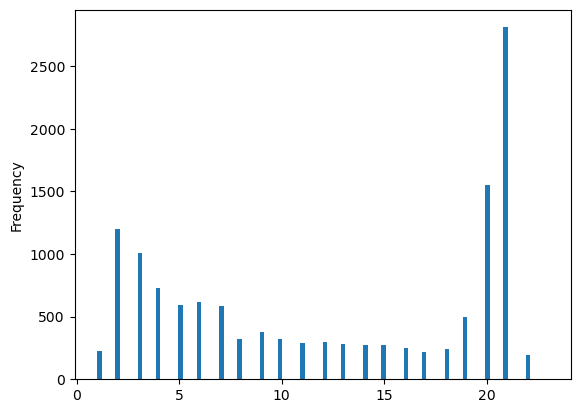

In [10]:
# Plot the distribution of number of rows per event_id
df["event_id"].value_counts().plot(kind='hist', bins=100)

In [13]:
# Mean of number of CDM for @event_id in the dataset (round to 2 decimals)
mean_cdms_per_event = df["event_id"].value_counts().mean().round(1)
print("Mean of number of CDM for @event_id in the dataset: {}".format(mean_cdms_per_event))

# Count number of rows for event_id 0
event_id = 3
print(f"Example of nb of CDMs for event_id n° {event_id}: {df[df['event_id'] == event_id].shape[0]}")

Mean of number of CDM for @event_id in the dataset: 12.4
Example of nb of CDMs for event_id n° 3: 21


##### ***What is the evolution of the distance between the spacecraft and debris*** ?

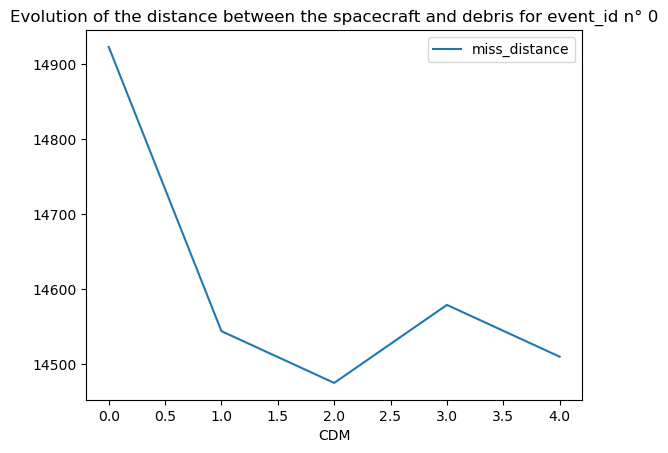

In [29]:
# Plot a line graph  that shows the evolution of the distance between the two spacecrafts for event_id
event_id = 0
df[df['event_id'] == event_id][['miss_distance']].reset_index(drop=True).plot(kind='line')

#set the x label
plt.xlabel("CDM") 

#set the title
plt.title("Evolution of the distance between the spacecraft and debris for event_id n° {}".format(event_id))
plt.show()